In [1]:
import pandas as pd
import numpy as np
births = pd.read_csv('../data/births.csv')
print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [13]:
births['decade'] = 5 * (births['year'] // 5)
birth = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(birth)

gender        F         M
decade                   
1965    1753634   1846572
1970    8224392   8659947
1975    8038683   8461603
1980    8898836   9356506
1985    9411515   9886946
1990    9913375  10395760
1995    9566079  10024793
2000    9931641  10406088
2005    8297668   8700340


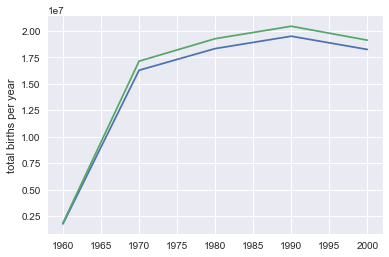

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(birth)
plt.ylabel('total births per year')
plt.show()

[4383. 4812. 5259.]
648.24 4812.0


Text(20.75, 0.5, 'mean births by day')

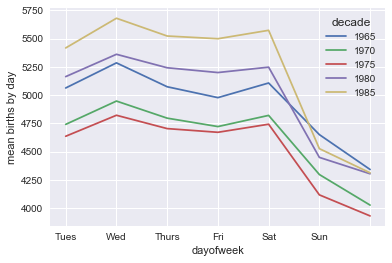

In [21]:
quartiles = np.percentile(births['births'], [25, 50 ,75])
print(quartiles)
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5*@sig) & (births < @mu + 5*@sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day,
                             format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
birthofweekday = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')
birthofweekday.plot()
plt.savefig('../outputfiles/不同年代不同星期的日均出生数据.jpg')
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day')
